In [ ]:
import pandas as pd
aisles = pd.read_csv("aisles.csv")
departments = pd.read_csv("departments.csv")

order_products_train = pd.concat([pd.read_csv("order_products__train.csv"),pd.read_csv('order_products__prior.csv')],axis=0)
orders = pd.read_csv("orders.csv")
products = pd.read_csv("products.csv")

In [ ]:
departments.head()

In [ ]:
aisles.head()

In [ ]:
products.head()

In [ ]:
orders.head()

In [ ]:
order_products_train.head()

products.aisle_id > aisles.aisle_id

products.department_id > departments.department_id

order_products_train.order_id > orders.order_id

In [ ]:
combined = pd.merge(order_products_train,orders,how="inner",left_on="order_id",right_on="order_id")
combined = pd.merge(products,combined,how="inner",left_on="product_id",right_on="product_id")
combined = pd.merge(aisles,combined,how="inner",left_on="aisle_id",right_on="aisle_id")
combined = pd.merge(departments,combined,how="inner",left_on="department_id",right_on="department_id")
combined.columns

In [ ]:
combined.shape,order_products_train.shape

In [ ]:
#should be 1
combined.groupby(['order_id','product_id']).count().max()

In [ ]:
missing = combined.isnull().sum().reset_index()
missing['Missing %'] = missing.iloc[:,1]/combined.shape[0]*100
missing.columns = ['Attribute Name','Missing Count','Missing %']
missing

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
combined.describe()

In [ ]:
#should be equal
print(combined.groupby(['order_id'])['product_id'].count().max())
print(combined['add_to_cart_order'].max())

In [ ]:
combined[combined['reordered'] ==1].groupby(['user_id'])['reordered'].count().describe()


In [ ]:
combined.groupby(['user_id'])['reordered'].count().describe()

In [ ]:
import matplotlib.pyplot as plt
plt.hist(combined['order_hour_of_day'],bins=24)
plt.ylabel("Count")
plt.xlabel("Hour of day")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.hist(combined['order_dow'].astype(int),bins=7)
plt.ylabel("Count")
plt.xlabel("Day of week")
plt.show()

In [ ]:
combined.groupby(['user_id'])['reordered'].count().values

In [ ]:
import matplotlib.pyplot as plt
plt.hist(combined.groupby(['user_id'])['reordered'].count().values)
plt.ylabel("Count")
plt.xlabel("Total products ordered per user")
plt.yscale("log")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
plt.hist(combined[combined['reordered']==1].groupby(['user_id'])['reordered'].count().values)
plt.ylabel("Count")
plt.xlabel("Total reordered products ordered per user")
plt.yscale("log")
plt.show()


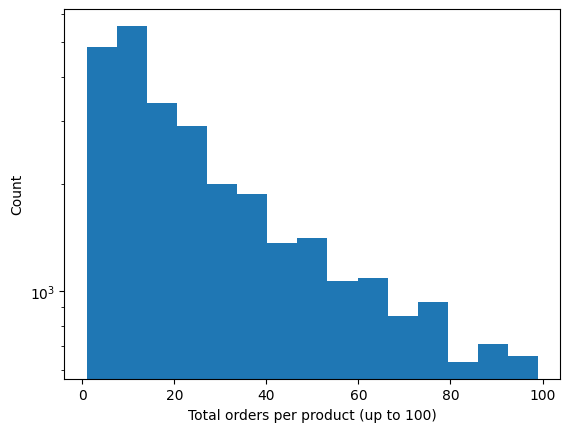

In [42]:
import matplotlib.pyplot as plt
a = combined.groupby(['product_id'])['reordered'].count().values
b = a[a<100]
plt.hist(b,bins=15)
plt.ylabel("Count")
plt.xlabel("Total orders per product (up to 100)")
plt.yscale("log")
plt.show()
